In [ ]:
import numpy as np
import os

import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl


print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")

### Clear GPU

In [ ]:
from keras import backend as K

K.clear_session()

In [ ]:
import tensorflow as tf
from numba import cuda
import gc

def clear_memory():
    # Clear VRAM
    tf.keras.backend.clear_session()
    cuda.select_device(0)
    cuda.close()

    # Clear RAM
    gc.collect()

#This should clear the VRAM and RAM
clear_memory()

### Import the Datasets in my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
training_set_path = '/content/drive/My Drive/[2024-2025] AN2DL/Homework 1'
folder_path = '/content/drive/My Drive/Datasets'

### Check GPU Existence and Status




In [ ]:
import tensorflow as tf

# List all GPUs TensorFlow detects
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow detected the following GPU(s):")
    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print(f"Name: {details['device_name']}")

In [ ]:
#This is to check GPU-Status and Usage (works only for NVIDIA GPUs)
!nvidia-smi

physical_devices = tf.config.list_physical_devices('GPU')
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

### Check Tensorflow and Keras Version


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

### Import all the libraries

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
import keras as tfk
from keras import layers as tfkl
from keras import regularizers

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

#Number of Classes in the Dataset
num_classes = 8

2.17.1


### Create a function to Load Data and load the datasets needed


In [ ]:
def load_data(path):
    # Load dataset from .npz file
    data = np.load(path)

    # Trim dataset to the first 11959 entries and discard the rest
    train_dataset = data['images'][:11959].copy()  # Copy to ensure no reference to the original array
    test_dataset = data['labels'][:11959].copy()

    # Explicitly delete the original data to free up memory
    del data

    return train_dataset, test_dataset

In [ ]:
# Execute function and load data
(X_test, y_test) = load_data(training_set_path+ "/" + "training_set.npz")

print("Test set shape (images):", X_test.shape)
print("Test set shape (labels):", y_test.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug, y_test_aug) = load_data(folder_path+ "/" +"augmented_set.npz")

print("Test set shape (images):", X_test_aug.shape)
print("Test set shape (labels):", y_test_aug.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug2, y_test_aug2) = load_data(folder_path+ "/" +"augmented_set2.npz")

print("Test set shape (images):", X_test_aug2.shape)
print("Test set shape (labels):", y_test_aug2.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug4, y_test_aug4) = load_data(folder_path+ "/" +"augmented_set4.npz")

print("Test set shape (images):", X_test_aug4.shape)
print("Test set shape (labels):", y_test_aug4.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


In [ ]:
# Execute function and load data
(X_test_aug5, y_test_aug5) = load_data(folder_path+ "/" +"augmented_set5.npz")

print("Test set shape (images):", X_test_aug5.shape)
print("Test set shape (labels):", y_test_aug5.shape)

Test set shape (images): (11959, 96, 96, 3)
Test set shape (labels): (11959, 1)


### Different Combination of Datasets

In [ ]:
# Prima concateniamo tutti gli X_test
X_all_test = np.concatenate([
    X_test,
    X_test_aug,
    X_test_aug2,
    X_test_aug5,
    X_test_aug4
], axis=0)

# Concateniamo tutti gli y_test
y_all_test = np.concatenate([
    y_test,
    y_test_aug,
    y_test_aug2,
    y_test_aug5,
    y_test_aug4
], axis=0)

# Creiamo un array di indici e lo mescoliamo
indices = np.arange(len(X_all_test))
np.random.shuffle(indices)

# Applichiamo la permutazione casuale a entrambi gli array
X_test_shuffled = X_all_test[indices]
y_test_shuffled = y_all_test[indices]

# Liberiamo memoria eliminando le variabili non più necessarie
del X_test_aug2, X_test_aug, X_test_aug4, X_test_aug5, X_test
del y_test_aug2, y_test_aug, y_test_aug4, y_test_aug5, y_test
del X_all_test, y_all_test
import gc
gc.collect()

15

In [ ]:
# Definiamo le proporzioni
train_size = 0.7  # 70% training
val_size = 0.15   # 15% validation
test_size = 0.15  # 15% test

# Calcoliamo gli indici di split
total_samples = len(X_test_shuffled)
train_samples = int(total_samples * train_size)
val_samples = int(total_samples * val_size)

# Dividiamo i dati
X_train = X_test_shuffled[:train_samples]
y_train = y_test_shuffled[:train_samples]

X_val = X_test_shuffled[train_samples:train_samples + val_samples]
y_val = y_test_shuffled[train_samples:train_samples + val_samples]

X_test = X_test_shuffled[train_samples + val_samples:]
y_test = y_test_shuffled[train_samples + val_samples:]

# Liberiamo memoria
del X_test_shuffled, y_test_shuffled
gc.collect()

# Stampiamo le dimensioni per verifica
print(f"Training set shape: {X_train.shape} - {y_train.shape}")
print(f"Validation set shape: {X_val.shape} - {y_val.shape}")
print(f"Test set shape: {X_test.shape} - {y_test.shape}")

Training set shape: (41856, 96, 96, 3) - (41856, 1)
Validation set shape: (8969, 96, 96, 3) - (8969, 1)
Test set shape: (8970, 96, 96, 3) - (8970, 1)


### One-hot Encoding

In [ ]:
# One-hot encoding usando keras
y_train = tfk.utils.to_categorical(y_train, num_classes=8)
y_val = tfk.utils.to_categorical(y_val, num_classes=8)
y_test = tfk.utils.to_categorical(y_test, num_classes=8)

# Stampiamo le dimensioni per verifica
print(f"Training labels shape after one-hot encoding: {y_train.shape}")
print(f"Validation labels shape after one-hot encoding: {y_val.shape}")
print(f"Test labels shape after one-hot encoding: {y_test.shape}")

# Verifichiamo che la codifica sia corretta mostrando alcuni esempi
print("\nEsempi di codifica one-hot:")
print("Classe 0:", y_train[np.where(y_train.argmax(axis=1) == 0)[0][0]])
print("Classe 7:", y_train[np.where(y_train.argmax(axis=1) == 7)[0][0]])

Training labels shape after one-hot encoding: (41856, 8)
Validation labels shape after one-hot encoding: (8969, 8)
Test labels shape after one-hot encoding: (8970, 8)

Esempi di codifica one-hot:
Classe 0: [1. 0. 0. 0. 0. 0. 0. 0.]
Classe 7: [0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# Calcola le class weights dalle y_train (prima di convertirle in one-hot)
from sklearn.utils.class_weight import compute_class_weight

# Ottieni le etichette originali dalle one-hot encoded
y_train_labels = np.argmax(y_train, axis=1)

# Calcola i class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

# Crea un dizionario di class weights
class_weights_dict = dict(enumerate(class_weights))

# Stampa le informazioni
print("Class distribution:")
for class_idx, count in enumerate(np.bincount(y_train_labels)):
    print(f"Class {class_idx}: {count} samples, weight = {class_weights_dict[class_idx]:.3f}")

# Visualizza anche in percentuale
total_samples = len(y_train_labels)
print("\nClass distribution (percentage):")
for class_idx, count in enumerate(np.bincount(y_train_labels)):
    percentage = (count / total_samples) * 100
    print(f"Class {class_idx}: {percentage:.1f}%")

Class distribution:
Class 0: 2974 samples, weight = 1.759
Class 1: 7636 samples, weight = 0.685
Class 2: 4086 samples, weight = 1.280
Class 3: 6781 samples, weight = 0.772
Class 4: 3030 samples, weight = 1.727
Class 5: 3687 samples, weight = 1.419
Class 6: 8381 samples, weight = 0.624
Class 7: 5281 samples, weight = 0.991

Class distribution (percentage):
Class 0: 7.1%
Class 1: 18.2%
Class 2: 9.8%
Class 3: 16.2%
Class 4: 7.2%
Class 5: 8.8%
Class 6: 20.0%
Class 7: 12.6%


### Define The First - Model

Model: "convnext_xlarge"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_prestem_… │ (None, 96, 96, 3)      │              0 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stem      │ (None, 24, 24, 256)    │         13,056 │ convnext_xlarge_prest… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └                      │ (None, 24, 24, 256)    │         12,544 │ -                      │
│ convnext_xlarge_stem_conv │                        │                │                        │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └                      │ (None, 24, 24, 256)    │            512 │ -                      │
│ convnext_xlarge_stem_lay… │                        │                │                        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │         12,800 │ convnext_xlarge_stem[… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │            512 │ convnext_xlarge_stage… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 1024)   │        263,168 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 1024)   │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │        262,400 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │            256 │ convnext_xlarge_stage… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 24, 24, 256)    │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 24, 24, 256)    │              0 │ convnext_xlarge_stem[… │
│                      

 Total params: 348,147,968 (1.30 GB)

 Trainable params: 348,147,968 (1.30 GB)

 Non-trainable params: 0 (0.00 B)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.952834 to fit



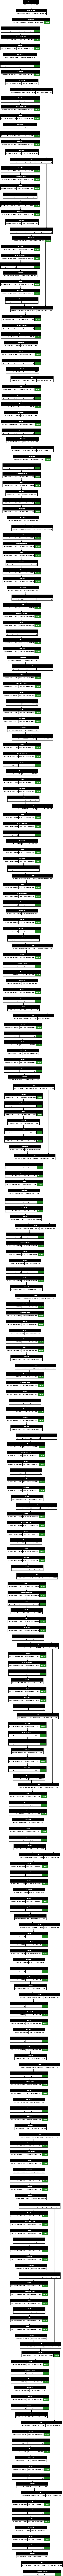

In [ ]:
# Initialise MobileNetV3Small model with pretrained weights, for transfer learning
mobilenet =  tf.keras.applications.ConvNeXtXLarge(
    include_top=False,             # Esclude il classificatore finale
    input_shape=(96, 96, 3),       # Dimensioni di input
    weights=None,                # Pesi preaddestrati su ImageNet
    input_tensor=None,             # Tensor di input (lascia None per usare input_shape)
    pooling=None,                  # Nessun pooling; specifica 'avg' per GlobalAveragePooling
    classes=8,                     # Numero di classi (non usato se include_top=False)
    classifier_activation="softmax" # Attivazione del classificatore (non usato se include_top=False)
)


# Display a summary of the model architecture
mobilenet.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
# Specify 'to_file' argument with a path where you have write permissions
tfk.utils.plot_model(mobilenet, to_file='/tmp/model.png', expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor
mobilenet.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

"""
# Definisci il pipeline completo di augmentazione
augmentation = tf.keras.Sequential([
    # Altre augmentazioni indipendenti
    tfkl.RandomCrop(height=96, width=96),  # Regola la dimensione del crop se necessario
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.Dropout(0.1),
    tfkl.Dropout(0.2),
    tfkl.RandomContrast(0.3),
    tfkl.RandomZoom(0.15),
    tfkl.RandomBrightness(0.1),
], name='advanced_preprocessing')


#Apply the augmentation pipeline
inputs = augmentation(inputs)
"""

# Pass augmented inputs through the MobileNetV3Small feature extractor
x = mobilenet(inputs)

x = tfkl.GlobalAveragePooling2D(name='avg_pool')(x)

# Add a batch normalization layer
x = tfkl.BatchNormalization(name='batch_norm')(x)

# Add a dropout layer for regularization
x = tfkl.Dropout(0.4, name='dropout')(x)

# Add a dense layer with 256 units and GELU activation
x = tfkl.Dense(256, activation='gelu', name='dense1')(x)


# Add layer normalizatiFinal_Project.ipynbon
x = tfkl.LayerNormalization(name='layer_norm1')(x)

# Add another dropout layer
x = tfkl.Dropout(0.4, name='dropout2')(x)

# Add a second dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense2')(x)

# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm2')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout3')(x)

# Add a third dense layer with 128 units and GELU activation
x = tfkl.Dense(128, activation='gelu', name='dense3')(x)
'''
# Add layer normalization
x = tfkl.LayerNormalization(name='layer_norm3')(x)

# Add another dropout layer
x = tfkl.Dropout(0.3, name='dropout4')(x)
'''
# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(8, activation='softmax', name='output')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Lion optimiser
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer= tfk.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 3, 3, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ input_layer (InputLayer)        │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 96, 96, 3)           │               0 │
│ convnext_xlarge_prestem_normalizati… │                             │                 │
│ (Normalization)                      │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ convnext_xlarge_stem            │ (None, 24, 24, 256)         │          13,056 │
│ (Sequential)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └ convnext_xlarge_stem_conv    │ (None, 24, 24, 256)         │          12,544 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│       └                              │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stem_layernorm       │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │          12,800 │
│ convnext_xlarge_stage_0_block_0_dep… │                             │                 │
│ (Conv2D)                             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             512 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │                 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │         263,168 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 1024)        │               0 │
│ convnext_xlarge_stage_0_block_0_gelu │                             │                 │
│ (Activation)                         │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │         262,400 │
│ convnext_xlarge_stage_0_block_0_poi… │                             │                 │
│ (Dense)                              │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └                                 │ (None, 24, 24, 256)         │             256 │
│ convnext_xlarge_stage_0_block_0_lay… │                             │              

 Total params: 348,731,912 (1.30 GB)

 Trainable params: 579,848 (2.21 MB)

 Non-trainable params: 348,152,064 (1.30 GB)

### Train First - Model


In [ ]:
# Train the model
tl_history = tl_model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=150,
    class_weight=class_weights_dict,
    validation_data=(X_val , y_val),
    callbacks=[tfk.callbacks.EarlyStopping(
        monitor='val_accuracy',
        mode='max', patience=20,
        restore_best_weights=True
        ),
               tfk.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,        # Riduzione graduale per un modello grande
        patience=40,        # ~25-30% delle epoche totali
        min_lr=1e-7,      # Considerando Adam come optimizer
        verbose=1,
        mode='min',
        min_delta=1e-4,   # Basato sulla scala delle tue loss
        cooldown=1        # Breve periodo di stabilizzazione
          )]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
#model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
#tl_model.save(model_filename)

# Save the trained model to a file, including final accuracy in the filename
model_filename = 'Blood_Cells_MobileNetV3S_' + str(final_val_accuracy) + '.keras'
tl_model.save(model_filename)

Epoch 1/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.3179 - loss: 1.7100 - val_accuracy: 0.3405 - val_loss: 1.6565 - learning_rate: 0.0010
Epoch 2/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 77s 118ms/step - accuracy: 0.3223 - loss: 1.6999 - val_accuracy: 0.3437 - val_loss: 1.6561 - learning_rate: 0.0010
Epoch 3/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.3237 - loss: 1.6958 - val_accuracy: 0.3408 - val_loss: 1.6526 - learning_rate: 0.0010
Epoch 4/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 78s 119ms/step - accuracy: 0.3291 - loss: 1.6829 - val_accuracy: 0.3486 - val_loss: 1.6543 - learning_rate: 0.0010
Epoch 5/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.3282 - loss: 1.6837 - val_accuracy: 0.3454 - val_loss: 1.6526 - learning_rate: 0.0010
Epoch 6/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.3294 - loss: 1.6779 - val_accuracy: 0.3469 - val_loss: 1.6484 - learning_rate: 0.0010
Epoch 7/150
654/654 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accura

In [ ]:
def clear_memory():
    tf.keras.backend.clear_session()
    cuda.select_device(0)
    cuda.close()
    gc.collect()

    # Libera memoria GPU
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

# Pulisci la memoria prima di iniziare
clear_memory()

### Test the First - Model


In [ ]:
# Generate predictions on the test set and print a classification report
y_pred = tl_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

del tl_model

### First Fine - Tuning


In [ ]:
# Re-load the model after transfer learning
#ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_62.46.keras')
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

In [ ]:
# Set the number of layers to freeze
N = 124

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_test,
    y = y_test,
    batch_size = 32,
    epochs = 7,
    validation_data = (X_val, y_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=2, restore_best_weights=True),
                 tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Riduzione graduale per un modello grande
    patience=2,        # ~25-30% delle epoche totali
    min_lr=1e-7,      # Considerando Adam come optimizer
    verbose=1,
    mode='min',
    min_delta=1e-4,   # Basato sulla scala delle tue loss
    cooldown=1        # Breve periodo di stabilizzazione
)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

del ft_model

### Second Fine - Tuning

In [ ]:
# Re-load the model after transfer learning
#ft_model = tfk.models.load_model('/content/Blood_Cells_MobileNetV3S_75.08.keras')
ft_model = tfk.models.load_model('Blood_Cells_MobileNetV3S_'+ str(final_val_accuracy) + '.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('convnext_xlarge').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('convnext_xlarge').layers:
    layer.trainable = False

# Enable training only for Conv2D and DepthwiseConv2D layers
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

In [ ]:
# Set the number of layers to freeze
N = 100

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('convnext_xlarge').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Compile the model with categorical cross-entropy loss and Adam optimiser
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# Enable mixed precision
tfk.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 64,
    epochs = 5,
    validation_data = (X_test, y_test),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=2, restore_best_weights=False),
                 tfk.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Riduzione graduale per un modello grande
    patience=1,        # ~25-30% delle epoche totali
    min_lr=1e-7,      # Considerando Adam come optimizer
    verbose=1,
    mode='min',
    min_delta=1e-4,   # Basato sulla scala delle tue loss
    cooldown=1        # Breve periodo di stabilizzazione
)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'Blood_Cells_MobileNetV3S_'+str(final_val_accuracy)+'.keras'
ft_model.save(model_filename)

# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test_aug2)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test_aug2.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


# Generate predictions on the test set and print a classification report
y_pred = ft_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_test_classes = y_test.argmax(axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))



### Submit Section


In [ ]:
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('Blood_Cells_MobileNetV3S_99.12.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
# The original path was incorrect. Using f-string to format correctly.
!zip {filename} model.py Blood_Cells_MobileNetV3S_99.12.keras

In [ ]:
!cp submission_241116_200916.zip /content/drive/MyDrive/